In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
defaultPars = {'figure.figsize': (5, 4),
               'lines.markersize' : 4,
               'axes.titlesize' : 13,
               'font.size' : 13,
               'axes.labelsize' : 16,
               'xtick.labelsize' : 13,
               'ytick.labelsize' : 13,
               'legend.fontsize' : 10,
               "text.usetex": True,
               "font.family": "sans-serif",
               "font.sans-serif": ["Helvetica"],
               'font.family':'Times New Roman', 
               'font.serif':'Times New Roman',
               "savefig.dpi" : 300,
               'contour.linewidth' : 2.0,
               'lines.linewidth' : 2.0,
               'axes.grid' : True,
               'grid.linewidth' : 0.5,
               'grid.color' : 'lightgray',
               'axes.axisbelow' : True
               }
plt.rcParams.update(defaultPars)

### Analytical expressions

In [3]:
def F(x):
    tau = 1/x
    if tau > 1:
        f = np.arcsin(1/np.sqrt(tau))**2
    else:
        f = -(1./4.)*(np.log((1+np.sqrt(1-tau))/(1-np.sqrt(1-tau)))-np.pi*1j)**2
    r = (3.0/2)*tau*(1+(1-tau)*f)

    return r

In [4]:
data = np.genfromtxt("pp2Sd_scan/Events/scan_run_[01-14].txt",names=True)
dataQ = np.genfromtxt("pp2Sd_scan/Events/scan_run_[15-28].txt",names=True)

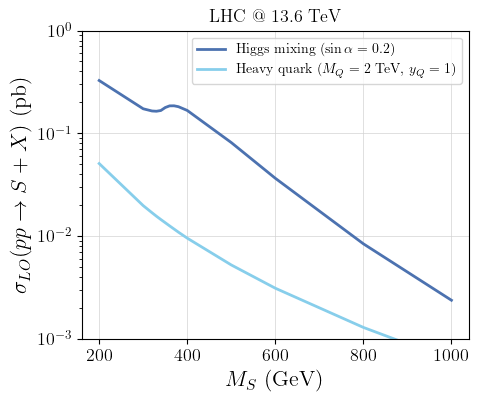

In [5]:
plt.plot(data['mass55'],data['cross'],label=r'Higgs mixing ($\sin\alpha = 0.2$)', color='#4c72b0')
plt.plot(dataQ['mass55'],dataQ['cross'],label=r'Heavy quark ($M_Q = 2$ TeV, $y_Q = 1$)', color='skyblue')
plt.yscale('log')
# plt.vlines(x=2*172.0,ymin=1e-2,ymax=3,linestyle='dashed',color='gray')
plt.legend()
plt.ylim(1e-3,1)
plt.ylabel(r'$\sigma_{LO} (p p \to S + X)$ (pb)')
plt.xlabel(r'$M_S$ (GeV)')
plt.title(r'LHC @ 13.6 TeV')
plt.show()

In [6]:
MT = 172.0
MQ = 2e3
xT = (data['mass55']/(2*MT))**2
xQ = (data['mass55']/(2*MQ))**2
FT = list(map(F,xT))
FQ = list(map(F,xQ))

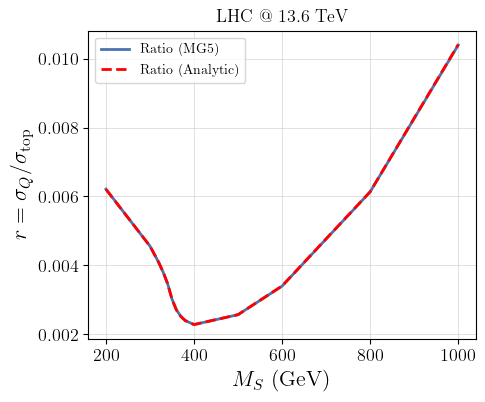

In [7]:
plt.plot(data['mass55'],dataQ['cross']/(data['cross']/0.2**2),label=r'Ratio (MG5)', color='#4c72b0')
plt.plot(data['mass55'],(np.absolute(FQ)/MQ)**2/((np.absolute(FT)/MT)**2),label=r'Ratio (Analytic)', color='red',linestyle='dashed')
plt.legend()
# plt.ylim(1e-3,1)
plt.ylabel(r'$r = \sigma_{Q}/\sigma_{\rm top}$')
plt.xlabel(r'$M_S$ (GeV)')
plt.title(r'LHC @ 13.6 TeV')
plt.show()